In [1]:
# imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, TimeDistributed,Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
#import keras.optimizers
import numpy as np
import os

In [3]:
!pip install keras

     |████████████████████████████████| 1.3 MB 622 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [5]:
!watch -n 2 nvidia-smi

>---------------------------------------------------------------------------+22n Sep 27 16:57:00 20218

In [2]:
!nvidia-smi

Fri Oct  1 11:32:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 470.63.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-DGXS...  Off  | 00000000:0F:00.0 Off |                    0 |
| N/A   47C    P0    39W / 300W |      0MiB / 32508MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Check if GPU available(for DGX machine)
#import tensorflow as tf
print(tf.test.is_gpu_available())
print(tf.test.is_built_with_cuda())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
True


In [4]:
# Load training data and labels

#x_train=np.load('/content/drive/MyDrive/PROJECT/DATASET/1/dataset_9021x500x23_xyz.npy')
#y_train=np.load('/content/drive/MyDrive/PROJECT/DATASET/1/dataset_labels_9021x500x3_xyz.npy')

#x_train = x_train.reshape(9021, 500, 23)
#y_train = y_train.reshape(9021, 500, 3)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
#In system,
#Loading training set with 9021 samples
#x_train=np.load('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/datasetX_normal_500.npy')
#y_train=np.load('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/datasetY_normal_500.npy')
#print("x_train: " + str(x_train.shape))
#print("y_train: " + str(y_train.shape))

#Loading test set with 189 proteins
#x_bench=np.load('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/bench_193x500x23_xyzjune21.npy')
#y_bench=np.load('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/bench_labels_193x500x3_xyzjune21.npy')
#print("x_test: " + str(x_bench.shape))
#print("y_test: " + str(y_bench.shape))

In [5]:
#In system,
#Loading training set with 9021 samples
x_train=np.load('datasetX_normal_9021x500.npy')
y_train=np.load('datasetY_normal_9021x500.npy')
print("x_train: " + str(x_train.shape))
print("y_train: " + str(y_train.shape))

#Loading test set with 189 proteins
x_bench=np.load('bench_193x500x23_xyzjune21.npy')
y_bench=np.load('bench_labels_193x500x3_xyzjune21.npy')
print("x_test: " + str(x_bench.shape))
print("y_test: " + str(y_bench.shape))

x_train: (103741500,)
y_train: (13531500,)
x_test: (2173500,)
y_test: (283500,)


In [6]:
# Load training data and labels

#x_train=np.load('datasetX_normal_500.npy')
#y_train=np.load('datasetY_normal_500.npy')

x_train = x_train.reshape(9021, 500, 23,1)
y_train = y_train.reshape(9021, 500, 3)

In [7]:
# benchmark data
#x_bench = np.load('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/bench_193x500x23_xyzjune21.npy')
#y_bench = np.load('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/bench_labels_193x500x3_xyzjune21.npy')

x_bench = x_bench.reshape(189, 500, 23, 1)
y_bench = y_bench.reshape(189, 500, 3) 

In [8]:
# Split dataset randomly for training and testing
# 1000 for testset and remaining for training and validation
import numpy as np
s = np.random.choice(range(x_train.shape[0]), 1000, replace=False)
#s1 = np.split(s, [1600])
#s2 = np.split(s, [900]) #testing

s1 = list(set(range(x_train.shape[0])) - set(s))

x_train_our = x_train[s1, :, :]
y_train_our = y_train[s1, :, :]

#x_val_s = x_train[s2, :, :]
#y_val_s = y_train[s2, :, :]

x_test_our = x_train[s, :, :]
y_test_our = y_train[s, :, :]

print(x_train_our.shape)
print(y_train_our.shape)
#print(x_val_s.shape)
#print(y_val_s.shape)
print(x_test_our.shape)
print(y_test_our.shape)

del s, s1#,x_train, y_train

(8021, 500, 23, 1)
(8021, 500, 3)
(1000, 500, 23, 1)
(1000, 500, 3)


In [9]:
#Reshaping for CNN
x_train_s = x_train_our.reshape(x_train_our.shape[0], 500, 23, 1)
#x_val_s = x_val_s.reshape(x_val_s.shape[0], 500, 23, 1)
x_test_s = x_test_our.reshape(x_test_our.shape[0], 500, 23, 1)

In [10]:
#reshaping
#x_train_s = x_train_s.reshape(x_train_s.shape[0], 500, 23, 1)
#x_val_s = x_val_s.reshape(x_val_s.shape[0], 500, 23, 1)
#x_test_s = x_test_s.reshape(x_test_s.shape[0], 500, 23, 1)

In [16]:
# defining the residual block
def residual_block(y, nb_channels, _strides=(1, 1), _project_shortcut=False):
    shortcut = y
    #shortcut = layers.Conv2D(nb_channels, kernel_size=(5, 5), strides=_strides, padding='same')(y) 
    # down-sampling is performed with a stride of 2
    y = layers.Conv2D(nb_channels, kernel_size=(5, 5), strides=_strides, padding='same')(y) 
    #y = layers.BatchNormalization()(y) 
    y = layers.LeakyReLU()(y) 
    # y = layers.MaxPool2D(pool_size=(2,2))(y)
    y = layers.Conv2D(nb_channels, kernel_size=(1, 1), activation='relu', padding='same')(y) 
    ##y = layers.BatchNormalization()(y)
    y = layers.add([shortcut, y])
    y = layers.LeakyReLU()(y)

    return y

In [17]:
#ResNet model definition
# ---------------------------------------------------

inp = layers.Input(shape=(x_train_s.shape[1], x_train_s.shape[2], x_train_s.shape[3]))
#m = layers.Masking(mask_value=0.0)(inp) 
m=(inp)
m = residual_block(m, 64)  
m = layers.Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same')(m)
#m = layers.BatchNormalization()(m) 
#m = Dropout(0.1)(m)
m = layers.Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same')(m)#not in original
#m = layers.BatchNormalization()(m) 
#m = Dropout(0.1)(m)
m = layers.Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same')(m) 
#m = layers.BatchNormalization()(m) 
#m = Dropout(0.1)(m)
m = residual_block(m, 32) 
m = layers.Conv2D(1, kernel_size=(1, 1), activation='relu', padding='same')(m)
m = layers.Reshape([500, 23])(m)
m = Dense(256, activation='relu')(m)#200
#m = Dropout(0.2)(m)
m = Dense(256, activation='relu')(m)#300
#m = Dropout(0.2)(m)
out = Dense(3, activation='softmax')(m)

model3 = tf.keras.Model(inputs=inp, outputs=out)

model3.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model3.compile(
    optimizer=opt,
    #optimizer='Adam',
    loss='kullback_leibler_divergence',
    #loss='categorical_crossentropy',
    #CCE larger loss
    metrics=['accuracy']
)

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 500, 23, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 500, 23, 64)  1664        input_3[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_8 (LeakyReLU)       (None, 500, 23, 64)  0           conv2d_16[0][0]                  
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 500, 23, 64)  4160        leaky_re_lu_8[0][0]              
_______________________________________________________________________________________

In [ ]:
#model architecture/layout
tf.keras.utils.plot_model(model3)


In [12]:
#Model training
fit3 = model3.fit(
  x_train_s, y_train_our,
  epochs=140,
  validation_split=0.1,#0.1 ok for 160epochs
  #validation_data=(x_val_s, y_val_s),
  #callbacks=[mc]
)

Epoch 1/140
226/226 [==============================] - 11s 50ms/step - loss: 0.4436 - accuracy: 0.2256 - val_loss: 0.4084 - val_accuracy: 0.2501
Epoch 2/140
226/226 [==============================] - 8s 36ms/step - loss: 0.3798 - accuracy: 0.3205 - val_loss: 0.3518 - val_accuracy: 0.8337
Epoch 3/140
226/226 [==============================] - 8s 36ms/step - loss: 0.3249 - accuracy: 0.8476 - val_loss: 0.2993 - val_accuracy: 0.8625
Epoch 4/140
226/226 [==============================] - 8s 36ms/step - loss: 0.2688 - accuracy: 0.8777 - val_loss: 0.2504 - val_accuracy: 0.8861
Epoch 5/140
226/226 [==============================] - 8s 36ms/step - loss: 0.2403 - accuracy: 0.8902 - val_loss: 0.2196 - val_accuracy: 0.8994
Epoch 6/140
226/226 [==============================] - 8s 36ms/step - loss: 0.2186 - accuracy: 0.8997 - val_loss: 0.2058 - val_accuracy: 0.9059
Epoch 7/140
226/226 [==============================] - 8s 36ms/step - loss: 0.2054 - accuracy: 0.9055 - val_loss: 0.1949 - val_accuracy

In [13]:
!pip install matplotlib

     |████████████████████████████████| 11.5 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 1.5 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


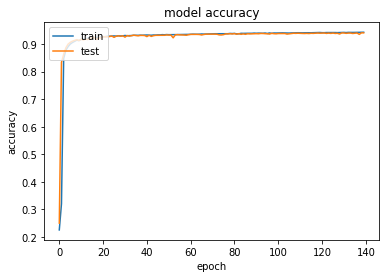

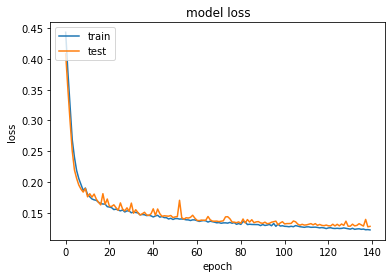

In [14]:
#For plotting the accuracy and loss curves

import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(fit3.history['accuracy'])
plt.plot(fit3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/accuracy88Accuracy.eps')

# loss graph
plt.plot(fit3.history['loss'])
plt.plot(fit3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/loss88Acculoss.eps')

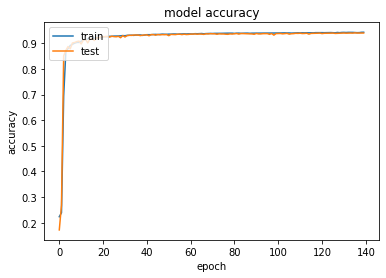

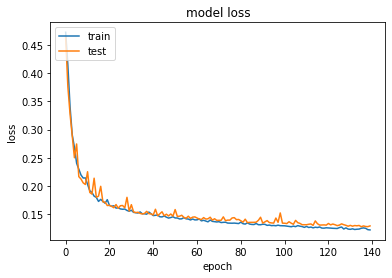

In [15]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(fit3.history['accuracy'])
plt.plot(fit3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/accuracy88Accuracy.eps')

# loss graph
plt.plot(fit3.history['loss'])
plt.plot(fit3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/loss88Acculoss.eps')

In [15]:
#Evaluation on test set(new set)
model3.evaluate(x_test_s, y_test_our)

32/32 [==============================] - 1s 16ms/step - loss: 0.1273 - accuracy: 0.9402


[0.127341166138649, 0.9402080178260803]

In [16]:
#Evaluation on benchmark set
model3.evaluate(x_bench, y_bench)

6/6 [==============================] - 0s 40ms/step - loss: 0.1331 - accuracy: 0.9419


[0.13309545814990997, 0.9418941736221313]

In [17]:
# ------------------------ResNet-LSTM model definition---------------------------

inp = layers.Input(shape=(x_train_s.shape[1], x_train_s.shape[2], x_train_s.shape[3]))
#m = layers.Masking(mask_value=0.0)(inp)#original
m=(inp)
m = residual_block(m, 64) #original 64
m = layers.Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same')(m)
#m = layers.BatchNormalization()(m)# was not there in original
#m = Dropout(0.1)(m)
m = layers.Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same')(m)#not in original
#m = layers.BatchNormalization()(m)# was not there in original
#m = Dropout(0.1)(m)
m = layers.Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same')(m)#not in original, in between a sudden change when I add this
#m = layers.BatchNormalization()(m)# was not there in original
#m = Dropout(0.1)(m)
m = residual_block(m, 32) #original 32
#m = layers.Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same')(m)#not in original
m = layers.Conv2D(1, kernel_size=(1, 1), activation='relu', padding='same')(m)
m = layers.Reshape([500, 23])(m)
m = layers.LSTM(32, return_sequences=True)(m)
#m = layers.Reshape([500, 23])(m)

#m = layers.LSTM(32, input_shape=(500,23), return_sequences=True),
m = Dense(256, activation='relu')(m)#200
#m = Dropout(0.2)(m)
m = Dense(256, activation='relu')(m)#300
#m = Dropout(0.2)(m)
out = Dense(3, activation='softmax')(m)

model7 = tf.keras.Model(inputs=inp, outputs=out)

model7.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model7.compile(
    optimizer=opt,
    #optimizer='Adam',
    loss='kullback_leibler_divergence',
    #loss='categorical_crossentropy',
    #CCE larger loss
    metrics=['accuracy']
)

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 500, 23, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 500, 23, 64)  640         input_2[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_4 (LeakyReLU)       (None, 500, 23, 64)  0           conv2d_8[0][0]                   
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 500, 23, 64)  4160        leaky_re_lu_4[0][0]              
_______________________________________________________________________________________

In [18]:
fit7 = model7.fit(
  x_train_s, y_train_our,
  epochs=120,
  validation_split=0.1,#0.1 ok for 160epochs
  #validation_data=(x_val_s, y_val_s),
  #callbacks=[mc]
)

Epoch 1/120
226/226 [==============================] - 13s 59ms/step - loss: 0.4688 - accuracy: 0.1774 - val_loss: 0.4676 - val_accuracy: 0.1818
Epoch 2/120
226/226 [==============================] - 12s 55ms/step - loss: 0.4245 - accuracy: 0.5523 - val_loss: 0.3850 - val_accuracy: 0.8117
Epoch 3/120
226/226 [==============================] - 13s 56ms/step - loss: 0.3386 - accuracy: 0.8388 - val_loss: 0.2927 - val_accuracy: 0.8665
Epoch 4/120
226/226 [==============================] - 13s 56ms/step - loss: 0.2574 - accuracy: 0.8830 - val_loss: 0.2419 - val_accuracy: 0.8908
Epoch 5/120
226/226 [==============================] - 13s 55ms/step - loss: 0.2219 - accuracy: 0.8994 - val_loss: 0.2089 - val_accuracy: 0.9057
Epoch 6/120
226/226 [==============================] - 13s 56ms/step - loss: 0.1993 - accuracy: 0.9095 - val_loss: 0.2068 - val_accuracy: 0.9065
Epoch 7/120
226/226 [==============================] - 13s 55ms/step - loss: 0.1902 - accuracy: 0.9137 - val_loss: 0.1842 - val_ac

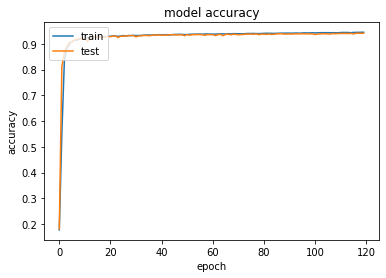

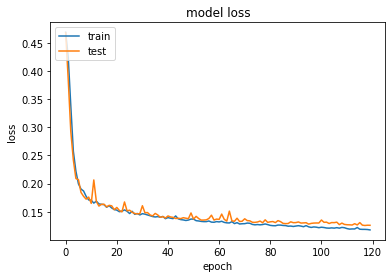

In [19]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(fit7.history['accuracy'])
plt.plot(fit7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/accuracy88Accuracy.eps')

# loss graph
plt.plot(fit7.history['loss'])
plt.plot(fit7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/loss88Acculoss.eps')

In [20]:
model7.evaluate(x_test_s, y_test_our)

32/32 [==============================] - 1s 20ms/step - loss: 0.1254 - accuracy: 0.9418


[0.12537510693073273, 0.9418060183525085]

In [21]:
model7.evaluate(x_bench, y_bench)

6/6 [==============================] - 0s 16ms/step - loss: 0.1340 - accuracy: 0.9430


[0.13398157060146332, 0.9430370330810547]

In [23]:
x_train_s = x_train_s.reshape(x_train_s.shape[0], 500, 23)
#x_val_s = x_val_s.reshape(x_val_s.shape[0], 500, 23)
x_test_s = x_test_s.reshape(x_test_s.shape[0], 500, 23)

In [26]:
#Using LSTM_1:

model8 = Sequential([
    layers.LSTM(64, input_shape=(500,23), return_sequences=True),
  #layers.Bidirectional(LSTM(hid_units,  activation = "tanh", return_sequences=True), merge_mode="concat",input_shape=(500,23)),
    Dense(1024, activation='relu'),
    Dropout(0.6),
     Dense(512, activation='relu'),
    Dropout(0.6),
    Dense(256, activation='relu'),
    Dropout(0.6),
     layers.TimeDistributed(Dense(3, activation = "softmax"))
])

model8.summary()


model8.compile(
    optimizer='adam',

   loss='kullback_leibler_divergence',
    metrics=['accuracy']
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 500, 64)           22528     
_________________________________________________________________
dense_18 (Dense)             (None, 500, 1024)         66560     
_________________________________________________________________
dropout_9 (Dropout)          (None, 500, 1024)         0         
_________________________________________________________________
dense_19 (Dense)             (None, 500, 512)          524800    
_________________________________________________________________
dropout_10 (Dropout)         (None, 500, 512)          0         
_________________________________________________________________
dense_20 (Dense)             (None, 500, 256)          131328    
_________________________________________________________________
dropout_11 (Dropout)         (None, 500, 256)         

In [27]:
fit8 = model8.fit(
  x_train_s, y_train_our,
  epochs=140,
  validation_split=0.2,#0.1 ok for 160epochs
  #validation_data=(x_val_s, y_val_s),
  #callbacks=[mc]
)

Epoch 1/140
201/201 [==============================] - 9s 46ms/step - loss: 0.4694 - accuracy: 0.1877 - val_loss: 0.4726 - val_accuracy: 0.1813
Epoch 2/140
201/201 [==============================] - 8s 42ms/step - loss: 0.4521 - accuracy: 0.6595 - val_loss: 0.4460 - val_accuracy: 0.2492
Epoch 3/140
201/201 [==============================] - 8s 42ms/step - loss: 0.4391 - accuracy: 0.4623 - val_loss: 0.4382 - val_accuracy: 0.2497
Epoch 4/140
201/201 [==============================] - 8s 42ms/step - loss: 0.4298 - accuracy: 0.3407 - val_loss: 0.4318 - val_accuracy: 0.2682
Epoch 5/140
201/201 [==============================] - 8s 42ms/step - loss: 0.4203 - accuracy: 0.5500 - val_loss: 0.4212 - val_accuracy: 0.7698
Epoch 6/140
201/201 [==============================] - 8s 42ms/step - loss: 0.4160 - accuracy: 0.5926 - val_loss: 0.4217 - val_accuracy: 0.7719
Epoch 7/140
201/201 [==============================] - 8s 42ms/step - loss: 0.4126 - accuracy: 0.6184 - val_loss: 0.4182 - val_accuracy:

In [28]:
#Reshaping for LSTM
x_bench = x_bench.reshape(189, 500, 23)

In [29]:
model8.evaluate(x_test_s, y_test_our)

32/32 [==============================] - 1s 16ms/step - loss: 0.2723 - accuracy: 0.8663


[0.27232226729393005, 0.8662539720535278]

In [30]:
model8.evaluate(x_test_s, y_test_our)

32/32 [==============================] - 1s 18ms/step - loss: 0.2723 - accuracy: 0.8663


[0.27232226729393005, 0.8662539720535278]

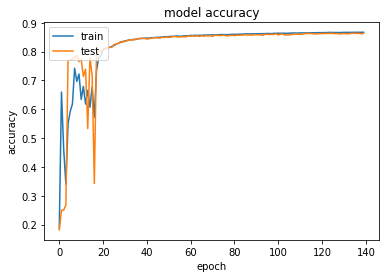

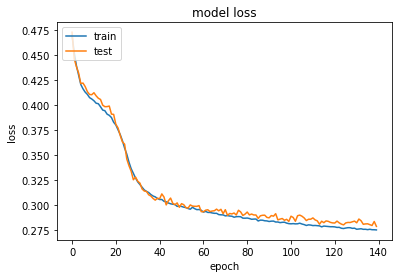

In [31]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(fit8.history['accuracy'])
plt.plot(fit8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/accuracy88Accuracy.eps')

# loss graph
plt.plot(fit8.history['loss'])
plt.plot(fit8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/loss88Acculoss.eps')

In [32]:
model8.evaluate(x_bench, y_bench)

6/6 [==============================] - 0s 15ms/step - loss: 0.2464 - accuracy: 0.8781


[0.24643921852111816, 0.8781375885009766]

In [37]:
#Using LSTM_2:

model9 = Sequential([
    layers.LSTM(64, input_shape=(500,23), return_sequences=True),
  #layers.Bidirectional(LSTM(hid_units,  activation = "tanh", return_sequences=True), merge_mode="concat",input_shape=(500,23)),
    Dense(1024, activation='relu'),
    Dropout(0.6),
     Dense(512, activation='relu'),
    Dropout(0.6),
    Dense(256, activation='relu'),
    Dropout(0.6),
     layers.TimeDistributed(Dense(3, activation = "softmax"))
])

model9.summary()


model9.compile(
    optimizer='adam',

   loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 500, 64)           22528     
_________________________________________________________________
dense_26 (Dense)             (None, 500, 1024)         66560     
_________________________________________________________________
dropout_15 (Dropout)         (None, 500, 1024)         0         
_________________________________________________________________
dense_27 (Dense)             (None, 500, 512)          524800    
_________________________________________________________________
dropout_16 (Dropout)         (None, 500, 512)          0         
_________________________________________________________________
dense_28 (Dense)             (None, 500, 256)          131328    
_________________________________________________________________
dropout_17 (Dropout)         (None, 500, 256)         

In [38]:
fit9 = model9.fit(
  x_train_s, y_train_our,
  epochs=140,
  validation_split=0.1,#0.1 ok for 160epochs
  #validation_data=(x_val_s, y_val_s),
  #callbacks=[mc]
)

Epoch 1/140
226/226 [==============================] - 9s 41ms/step - loss: 0.4702 - accuracy: 0.1866 - val_loss: 0.4711 - val_accuracy: 0.1736
Epoch 2/140
226/226 [==============================] - 9s 39ms/step - loss: 0.4557 - accuracy: 0.6040 - val_loss: 0.4445 - val_accuracy: 0.7573
Epoch 3/140
226/226 [==============================] - 9s 38ms/step - loss: 0.4364 - accuracy: 0.7276 - val_loss: 0.4328 - val_accuracy: 0.7542
Epoch 4/140
226/226 [==============================] - 9s 39ms/step - loss: 0.4255 - accuracy: 0.6742 - val_loss: 0.4200 - val_accuracy: 0.7747
Epoch 5/140
226/226 [==============================] - 9s 39ms/step - loss: 0.4187 - accuracy: 0.7636 - val_loss: 0.4154 - val_accuracy: 0.7795
Epoch 6/140
226/226 [==============================] - 9s 38ms/step - loss: 0.4144 - accuracy: 0.7763 - val_loss: 0.4132 - val_accuracy: 0.7762
Epoch 7/140
226/226 [==============================] - 9s 39ms/step - loss: 0.4119 - accuracy: 0.7767 - val_loss: 0.4109 - val_accuracy:

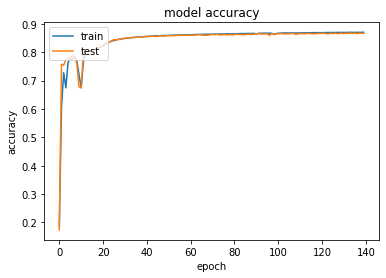

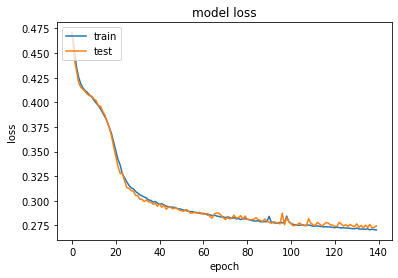

In [39]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(fit9.history['accuracy'])
plt.plot(fit9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/accuracy88Accuracy.eps')

# loss graph
plt.plot(fit9.history['loss'])
plt.plot(fit9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/loss88Acculoss.eps')

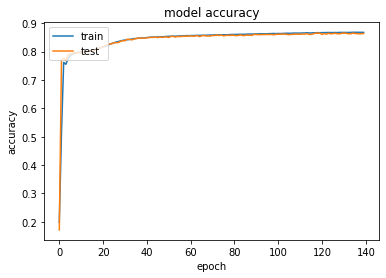

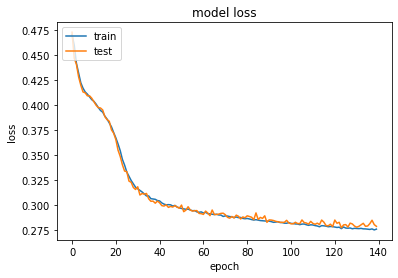

In [35]:
#old one
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(fit9.history['accuracy'])
plt.plot(fit9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/accuracy88Accuracy.eps')

# loss graph
plt.plot(fit9.history['loss'])
plt.plot(fit9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/loss88Acculoss.eps')

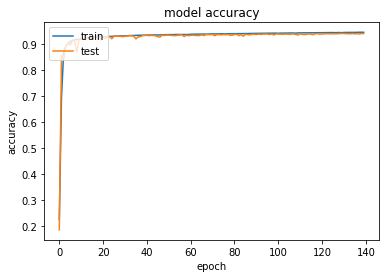

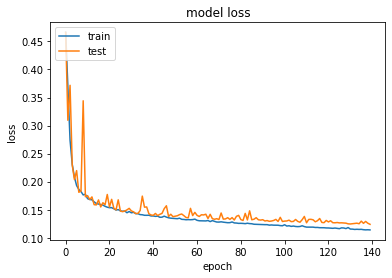

In [ ]:
#old one
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(fit3.history['accuracy'])
plt.plot(fit3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/accuracy88Accuracy.eps')

# loss graph
plt.plot(fit3.history['loss'])
plt.plot(fit3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/loss88Acculoss.eps')

In [ ]:
#ResNet Model old one
model3.evaluate(x_test_s, y_test_our)

32/32 [==============================] - 1s 17ms/step - loss: 0.1244 - accuracy: 0.9413


[0.12441632151603699, 0.9412940144538879]

In [ ]:
#ResNet Model old one
model3.evaluate(x_bench, y_bench)

6/6 [==============================] - 0s 47ms/step - loss: 0.1306 - accuracy: 0.9426


[0.1306268870830536, 0.9425714015960693]

In [ ]:
model3.save('ResNETForStructureAssignment94JulyAccuracymodel')
model3.save_weights('ResNETForStructureAssignmentWeights94JulyAccuracymodel.h5')

In [ ]:
model3.save('ResNETForStructureAssignment94JulyAccuracymodel2')
model3.save_weights('ResNETForStructureAssignmentWeights94JulyAccuracymodel2.h5')
#saved one 94.51,94.20,94.32,94.44(160 epochs)
#+60 94.84,94.37,94.39,94.45

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ResNETForStructureAssignment94JulyAccuracymodel2/assets


In [6]:
#from keras.models import load_model
#saved_model2 = load_model('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/ResNETForStructureAssignmentWeights94JulyAccuracymodel2')

In [22]:
from keras.models import load_model
saved_model = load_model('ResNETForStructureAssignment94JulyAccuracy')

In [23]:
saved_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500, 23, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 500, 23, 64)  1664        input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 500, 23, 64)  0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 500, 23, 64)  4160        leaky_re_lu[0][0]                
_______________________________________________________________________________________

In [11]:
saved_model2.summary()#saved model 2

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500, 23, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 500, 23, 64)  1664        input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 500, 23, 64)  0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 500, 23, 64)  4160        leaky_re_lu[0][0]                
_______________________________________________________________________________________

In [24]:
#ResNet model 94.70 and 94.44 (comparable to ResNet-LSTM)
saved_model.evaluate(x_test_s, y_test_our)

32/32 [==============================] - 1s 30ms/step - loss: 0.1149 - accuracy: 0.9470


[0.11489629000425339, 0.9469699859619141]

In [25]:
#ResNet model 94.70 and 94.44 (comparable to ResNet-LSTM)
saved_model.evaluate(x_bench, y_bench)

6/6 [==============================] - 0s 75ms/step - loss: 0.1317 - accuracy: 0.9444


[0.1316612958908081, 0.9443915486335754]

In [19]:
#ResNet model2 94.70 and 94.44 (comparable to ResNet-LSTM)
saved_model2.evaluate(x_test_s, y_test_our)

32/32 [==============================] - 5s 162ms/step - loss: 0.1133 - accuracy: 0.9460


[0.11331114917993546, 0.9460060000419617]

In [20]:
#ResNet model2 94.70 and 94.44 (comparable to ResNet-LSTM)
saved_model2.evaluate(x_bench, y_bench)

6/6 [==============================] - 1s 114ms/step - loss: 0.1306 - accuracy: 0.9426


[0.1306268870830536, 0.9425714015960693]

In [34]:
# ------------------------ResNet-LSTM---------------------------

inp = layers.Input(shape=(x_train_s.shape[1], x_train_s.shape[2], x_train_s.shape[3]))
#m = layers.Masking(mask_value=0.0)(inp)#original
m=(inp)
m = residual_block(m, 64) #original 64
m = layers.Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same')(m)
#m = layers.BatchNormalization()(m)# was not there in original
#m = Dropout(0.1)(m)
m = layers.Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same')(m)#not in original
#m = layers.BatchNormalization()(m)# was not there in original
#m = Dropout(0.1)(m)
m = layers.Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same')(m)#not in original, in between a sudden change when I add this
#m = layers.BatchNormalization()(m)# was not there in original
#m = Dropout(0.1)(m)
m = residual_block(m, 32) #original 32
#m = layers.Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same')(m)#not in original
m = layers.Conv2D(1, kernel_size=(1, 1), activation='relu', padding='same')(m)
m = layers.Reshape([500, 23])(m)
m = layers.LSTM(32, return_sequences=True)(m)
#m = layers.Reshape([500, 23])(m)

#m = layers.LSTM(32, input_shape=(500,23), return_sequences=True),
m = Dense(256, activation='relu')(m)#200
#m = Dropout(0.2)(m)
m = Dense(256, activation='relu')(m)#300
#m = Dropout(0.2)(m)
out = Dense(3, activation='softmax')(m)

model15 = tf.keras.Model(inputs=inp, outputs=out)

model15.summary()

opt = keras.optimizers.Nadam(learning_rate=0.0001)
model15.compile(
    optimizer=opt,
    #optimizer='Adam',
    loss='kullback_leibler_divergence',
    #loss='categorical_crossentropy',
    #CCE larger loss
    metrics=['accuracy']
)

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 500, 23, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 500, 23, 64)  1664        input_2[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_4 (LeakyReLU)       (None, 500, 23, 64)  0           conv2d_8[0][0]                   
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 500, 23, 64)  4160        leaky_re_lu_4[0][0]              
_______________________________________________________________________________________

In [28]:
fit15 = model15.fit(
  x_train_s, y_train_our,
  epochs=140,
  validation_split=0.1,
  #validation_data=(x_val_s, y_val_s),
  #callbacks=[mc]
)
#overfitting in plots

Epoch 1/140
226/226 [==============================] - 24s 108ms/step - loss: 0.4697 - accuracy: 0.1803 - val_loss: 0.4664 - val_accuracy: 0.1785
Epoch 2/140
226/226 [==============================] - 22s 99ms/step - loss: 0.4681 - accuracy: 0.1816 - val_loss: 0.4641 - val_accuracy: 0.1768
Epoch 3/140
226/226 [==============================] - 22s 99ms/step - loss: 0.4103 - accuracy: 0.5121 - val_loss: 0.4763 - val_accuracy: 0.7524
Epoch 4/140
226/226 [==============================] - 22s 98ms/step - loss: 0.2852 - accuracy: 0.8461 - val_loss: 0.2605 - val_accuracy: 0.8774
Epoch 5/140
226/226 [==============================] - 22s 98ms/step - loss: 0.2239 - accuracy: 0.8956 - val_loss: 0.2120 - val_accuracy: 0.9043
Epoch 6/140
226/226 [==============================] - 22s 98ms/step - loss: 0.2016 - accuracy: 0.9072 - val_loss: 0.1931 - val_accuracy: 0.9125
Epoch 7/140
226/226 [==============================] - 22s 96ms/step - loss: 0.1880 - accuracy: 0.9145 - val_loss: 0.1754 - val_a

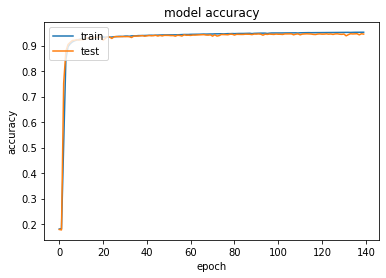

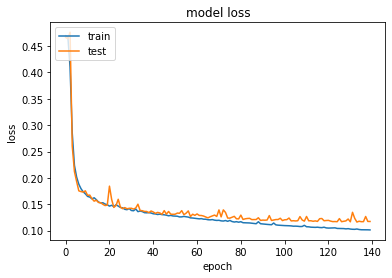

In [31]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(fit15.history['accuracy'])
plt.plot(fit15.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/accuracy88Accuracy.eps')

# loss graph
plt.plot(fit15.history['loss'])
plt.plot(fit15.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/loss88Acculoss.eps')
#loss: 0.2982 - accuracy: 0.8567 - val_loss: 0.2981 - val_accuracy: 0.8560 # 32 units
#overfitting in plots

In [20]:
x_train_s = x_train_our.reshape(x_train_our.shape[0], 500, 23, 1)
#x_val_s = x_val_s.reshape(x_val_s.shape[0], 500, 23, 1)
x_test_s = x_test_our.reshape(x_test_our.shape[0], 500, 23, 1)

In [21]:
model15.evaluate(x_test_s, y_test_our)

32/32 [==============================] - 1s 23ms/step - loss: 0.1224 - accuracy: 0.9429


[0.1224449872970581, 0.942933976650238]

In [22]:
model15.evaluate(x_bench, y_bench)

6/6 [==============================] - 0s 55ms/step - loss: 0.1359 - accuracy: 0.9416


[0.13586899638175964, 0.9415978789329529]

In [13]:
#Using BLSTM (experimental purposes)

model12 = Sequential([
    #layers.LSTM(64, input_shape=(500,23), return_sequences=True),
  layers.Bidirectional(LSTM(32,  activation = "tanh", return_sequences=True), merge_mode="concat",input_shape=(500,23)),
   # Dense(1024, activation='relu'),
   # Dropout(0.6),
   #  Dense(512, activation='relu'),
    #Dropout(0.6),
    #Dense(256, activation='relu'),
    #Dropout(0.6),
     layers.TimeDistributed(Dense(3, activation = "softmax"))
])

model12.summary()


model12.compile(
    optimizer='adam',

   loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 500, 64)           14336     
_________________________________________________________________
time_distributed (TimeDistri (None, 500, 3)            195       
Total params: 14,531
Trainable params: 14,531
Non-trainable params: 0
_________________________________________________________________


In [12]:
x_train_s = x_train_our.reshape(x_train_our.shape[0], 500, 23)
#x_val_s = x_val_s.reshape(x_val_s.shape[0], 500, 23, 1)
x_test_s = x_test_our.reshape(x_test_our.shape[0], 500, 23)

In [ ]:
fit12 = model12.fit(#BLSTM is not giving good accuracy
  x_train_s, y_train_our,
  epochs=140,
  validation_split=0.2,
  #validation_data=(x_val_s, y_val_s),
  #callbacks=[mc]
)

In [15]:
#Using BLSTM:

model13 = Sequential([
    #layers.LSTM(64, input_shape=(500,23), return_sequences=True),
  layers.Bidirectional(LSTM(32,  activation = "tanh", return_sequences=True), merge_mode="concat",input_shape=(500,23)),
    Dense(1024, activation='relu'),
    Dropout(0.6),
     Dense(512, activation='relu'),
    Dropout(0.6),
    Dense(256, activation='relu'),
    Dropout(0.6),
     layers.TimeDistributed(Dense(3, activation = "softmax"))
])

model13.summary()


model13.compile(
    optimizer='adam',

   loss='kullback_leibler_divergence',
    metrics=['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 500, 64)           14336     
_________________________________________________________________
dense_4 (Dense)              (None, 500, 1024)         66560     
_________________________________________________________________
dropout (Dropout)            (None, 500, 1024)         0         
_________________________________________________________________
dense_5 (Dense)              (None, 500, 512)          524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 512)          0         
_________________________________________________________________
dense_6 (Dense)              (None, 500, 256)          131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 256)         

In [1]:
fit13 = model13.fit(#BLSTM not giving good accuracy
  x_train_s, y_train_our,
  epochs=140,
  validation_split=0.2,
  #validation_data=(x_val_s, y_val_s),
  #callbacks=[mc]
)

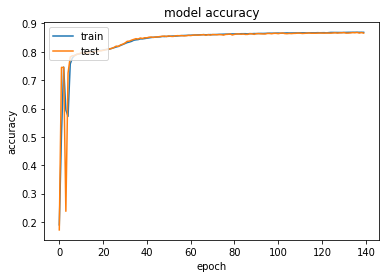

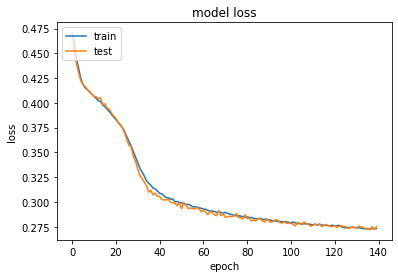

In [21]:
#This is for previous LSTM model
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(fit2.history['accuracy'])
plt.plot(fit2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/accuracy88Accuracy.eps')

# loss graph
plt.plot(fit2.history['loss'])
plt.plot(fit2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/loss88Acculoss.eps')
#loss: 0.2982 - accuracy: 0.8567 - val_loss: 0.2981 - val_accuracy: 0.8560 # 32 units

In [22]:
model8.evaluate(x_test_s, y_test_our)

32/32 [==============================] - 2s 51ms/step - loss: 0.2703 - accuracy: 0.8676


[0.27026307582855225, 0.8676139712333679]

In [26]:
x_bench = x_bench.reshape(189, 500, 23)
y_bench = y_bench.reshape(189, 500, 3) 

In [ ]:
model8.evaluate(x_bench, y_bench)

Testing on individual proteins from the test set

In [19]:
x_train_s = x_train_our.reshape(x_train_our.shape[0], 500, 23, 1)
#x_val_s = x_val_s.reshape(x_val_s.shape[0], 500, 23, 1)
x_test_s = x_test_our.reshape(x_test_our.shape[0], 500, 23, 1)

In [ ]:
# benchmark data
x_bench = np.load('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/bench_193x500x23_xyzjune21.npy')
y_bench = np.load('/content/drive/MyDrive/CNN_for_STR_ASSIGNMENT_DATA_and_CODES/bench_labels_193x500x3_xyzjune21.npy')

x_bench = x_bench.reshape(189, 500, 23, 1)
y_bench = y_bench.reshape(189, 500, 3) 

In [ ]:
results12 = saved_model.evaluate(x_bench, y_bench)

In [ ]:
results12 = saved_model.evaluate(x_bench, y_bench)

6/6 [==============================] - 46s 268ms/step - loss: 0.1305 - accuracy: 0.9441


In [57]:

ti = 10

preds = saved_model.predict(x_bench[ti].reshape(1, 500, 23, 1))

label_index = np.argmax(preds, axis=2)

labels = [1, 0, 0, 0, 1, 0, 0, 0, 1]

labels = np.array(labels)
labels = labels.reshape(3, 3)

#print(labels)

t = 0
x = 0
for i, j in zip(label_index[0], y_bench[ti]):
  if (str('[0 0 0]') == str(j)):
    break
  t += 1
  if (str(labels[i]) != str(j)):
    x += 1
t=t-1
print("Mismatch in classes: " + str(x) + "\nLength of sequence: " + str(t))
print("Length of sequence: " + str(t))
print("Accuracy: " + str(((t-x)/t)*100) + "%")
for k in range(0,t):
  if (label_index[0][k])==0:
    print("H",end=' ')
  if (label_index[0][k])==1:
    print("E",end=' ')
  if (label_index[0][k])==2:
    print("C",end=' ')
  #print(label_index[0][k])

  #10 ok,15-helix only,16,18-92,25-helix only

Mismatch in classes: 20
Length of sequence: 257
Length of sequence: 257
Accuracy: 92.21789883268482%
C C C C C C C C C C H H H H H H H C H H H H C C C C C C C E E C H H H C C C C C C C C C E E E E E C H C H C E E E E E E C C C E E E E E C C C C C C C E E E C C C C C C C E E E E E E E E E E C C C C C C C C C C E E C C E E C C C E E E E E E E C C C C C C C H H H H H C C C C C E E E E E E E E E C C C C C H H H H H H H H H H H H C C C C C C E E E C C C C C H H H H C C C C C C E E E E C E E C C C C C C C C C E E E E E E C E E E E E C H H H H H H H H H C C C C C C C C C C C C C C C C C C C C C C C C C C E E E E C 

In [62]:

ti = 25

preds = saved_model.predict(x_bench[ti].reshape(1, 500, 23, 1))

label_index = np.argmax(preds, axis=2)

labels = [1, 0, 0, 0, 1, 0, 0, 0, 1]

labels = np.array(labels)
labels = labels.reshape(3, 3)

#print(labels)

t = 0
x = 0
for i, j in zip(label_index[0], y_bench[ti]):
  if (str('[0 0 0]') == str(j)):
    break
  t += 1
  if (str(labels[i]) != str(j)):
    x += 1
t=t-1
print("Mismatch in classes: " + str(x) + "\nLength of sequence: " + str(t))
print("Length of sequence: " + str(t))
print("Accuracy: " + str(((t-x)/t)*100) + "%")
for k in range(0,t):
  if (label_index[0][k])==0:
    print("H",end=' ')
  if (label_index[0][k])==1:
    print("E",end=' ')
  if (label_index[0][k])==2:
    print("C",end=' ')
  #print(label_index[0][k])

  #10 ok,15-helix only,16,18-92,25-helix only

Mismatch in classes: 5
Length of sequence: 141
Length of sequence: 141
Accuracy: 96.45390070921985%
C H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H C C C C C H H H H C H H H H H H H H H H H H H H H H H H H H H H H H C C C C H C H H H H H H H H H H H H H H H H H H H H H H H H H H H C C C H H H H H H C C H H H H H H H H H H H H H H H H H H H H H H H H H 